Importing necessary libraries for data handling and analysis

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

Creating a dataset with various parameters that influence leadership decisions in vehicle platooning

In [13]:
data = {
    'leftLaneAvailable': [1, 1, 0, 0, 1, 0],  # Binary indicator: 1 if left lane is available, 0 otherwise
    'rightLaneAvailable': [1, 0, 1, 0, 0, 1],  # Binary indicator: 1 if right lane is available, 0 otherwise
    'inNormalSteering': [1, 1, 0, 0, 1, 0],  # Binary indicator: 1 if in normal steering mode, 0 otherwise
    'distance': [10, 20, 30, 25, 15, 40],  # Numerical value: Distance of the route in kilometers
    'route_match': [0.9, 0.8, 0.75, 0.85, 0.95, 0.7],  # Numerical value: Match percentage of the route
    'consumption': [10, 12, 11, 9, 8, 15],  # Numerical value: Fuel consumption rate
    'body_weight': [1500, 1600, 1550, 1450, 1480, 1700],  # Numerical value: Vehicle body weight in kilograms
    'sensor_equipped': [1, 0, 1, 1, 0, 1],  # Binary indicator: 1 if equipped with advanced sensors, 0 otherwise
    'is_leader': [1, 0, 1, 0, 1, 0]  # Target variable: 1 if the vehicle is suitable to be a leader, 0 otherwise
}

Converting the dictionary into a DataFrame for easier data manipulation

In [14]:
df = pd.DataFrame(data)

Splitting data into features (X) and the target variable (y)

In [15]:
X = df.drop('is_leader', axis=1)  # Features include all columns except 'is_leader'
y = df['is_leader']  # Target variable is 'is_leader'

Dividing the dataset into training and testing sets to evaluate the effectiveness of our analysis

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Creating a decision tree model to analyze how different factors affect leadership suitability

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)  # Training the model with training data

DecisionTreeClassifier(random_state=42)

Using the trained model to predict leadership on the test dataset

In [18]:
predictions = model.predict(X_test)

Evaluating the accuracy of the predictions

In [19]:
print("Model Accuracy:", accuracy_score(y_test, predictions))
print("Detailed Classification Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 0.5
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualizing the decision tree to understand the decision-making process

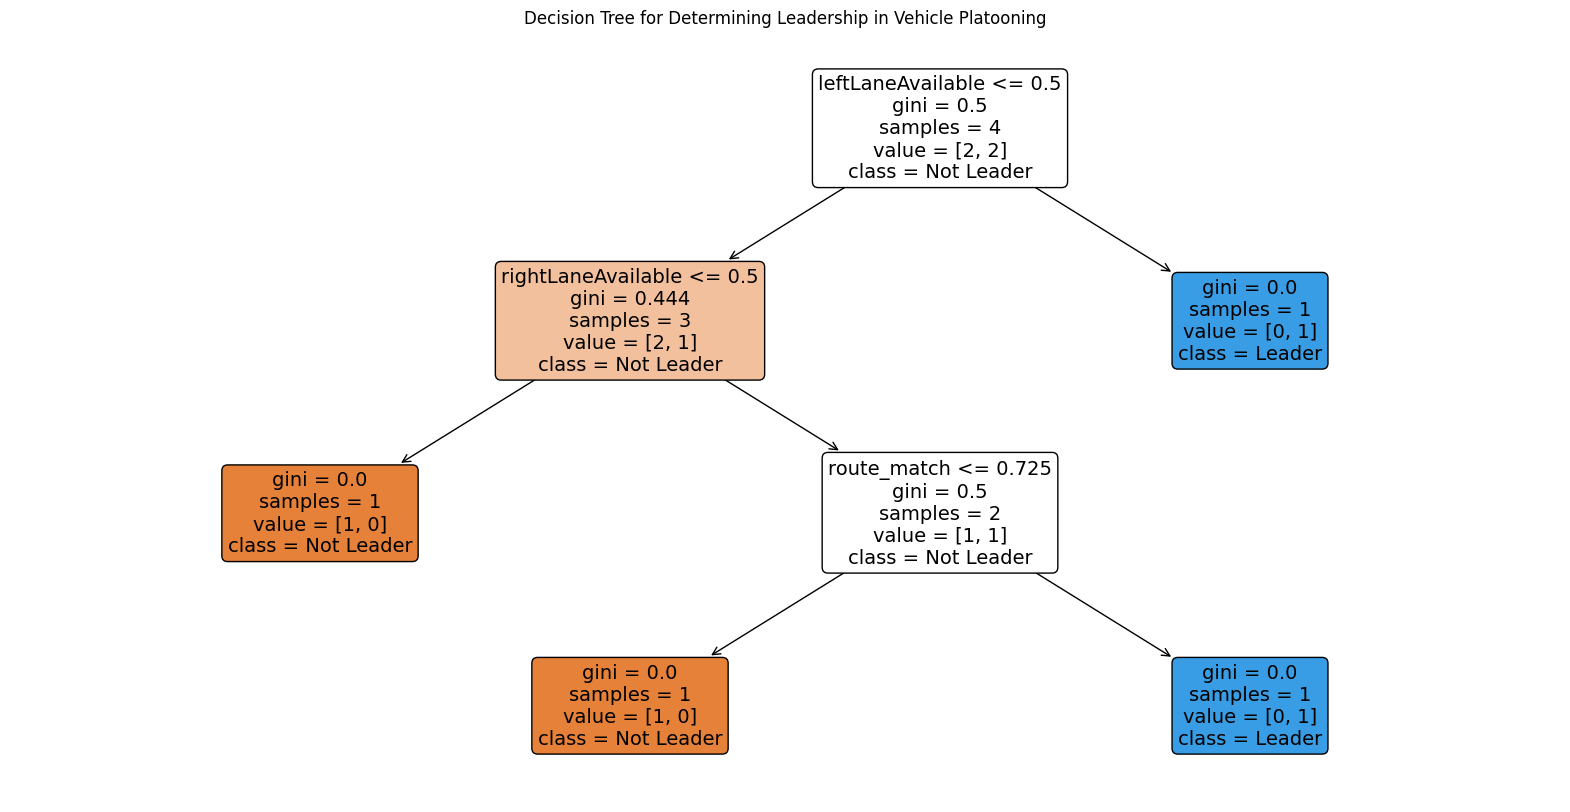

In [20]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Leader', 'Leader'], rounded=True, fontsize=14)
plt.title('Decision Tree for Determining Leadership in Vehicle Platooning')
plt.show()